# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
import pdb
from collections import deque
import torch
import pickle
#from ddpg_agent import Agent
import matplotlib.pyplot as plt
import pdb
from workspace_utils import active_session
import pickle

#agent = Agent(state_size=states.shape[1], action_size=action_size, random_seed=10)
#model.load_state_dict(torch.load(PATH))
#agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

In [7]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    counter = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        #pdb.set_trace()
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        #pdb.set_trace()
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        #print(rewards)
        dones = env_info.local_done                        # see if episode finished
        #print(dones)
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        counter += 1
        if np.any(dones):                                  # exit loop if episode finished
            print(counter)
            break
            
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

15
Total score (averaged over agents) this episode: -0.004999999888241291
14
Total score (averaged over agents) this episode: -0.004999999888241291
14
Total score (averaged over agents) this episode: -0.004999999888241291
31
Total score (averaged over agents) this episode: 0.04500000085681677
14
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

Class for storing and saving results and parameters

In [12]:
class StoreResults():
    def __init__(self):
        
        #self.dict = {"index": None, "desc": None, "result": None}
        self.load()
    
    def load(self):
        try:
            f = open("file.pkl", "rb")
            self.dicto = pickle.load(f)
            self.counter = max(list(self.dicto.keys())) + 1
            f.close()
        except:
            print("file missing")
            self.counter = 0
            self.dicto = {}
    def save(self, desc, result, ave_last_100, loss_dict):
        self.dicto[self.counter] = {}
        self.dicto[self.counter]["desc"] = desc
        self.dicto[self.counter]["BUFFER_SIZE"] = BUFFER_SIZE
        self.dicto[self.counter]["BATCH_SIZE"] = BATCH_SIZE
        self.dicto[self.counter]["GAMMA"] = GAMMA
        self.dicto[self.counter]["TAU"] = TAU
        self.dicto[self.counter]["LR_ACTOR"] = LR_ACTOR
        self.dicto[self.counter]["LR_CRITIC"] = LR_CRITIC
        self.dicto[self.counter]["WEIGHT_DECAY"] = WEIGHT_DECAY
        self.dicto[self.counter]["UPDATE_EVERY"] = UPDATE_EVERY
        self.dicto[self.counter]["UPDATES"] = UPDATES
        self.dicto[self.counter]["result"] = result
        self.dicto[self.counter]["ave_last_100"] = ave_last_100
        self.dicto[self.counter]["actor_nn"] = [33, 128, 64, 4]
        self.dicto[self.counter]["critic_nn"] = [33, 128, 128, 64, 1]
        self.dicto[self.counter]["loss_dict"] = loss_dict
        
        
        self.counter += 1
        f = open("file.pkl", "wb")
        pickle.dump(self.dicto, f)
        f.close()

Actor and Critic Configuration

In [13]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor(nn.Module):
    """Actor (Policy) Model."""

    #def __init__(self, state_size, action_size, seed, fc_units=256):
    #def __init__(self, state_size, action_size, seed, fc_units=128):
    def __init__(self, state_size, action_size, seed, fc_units=512):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc_units)
        #self.fc2 = nn.Linear(fc_units, action_size)
        self.fc2 = nn.Linear(fc_units, np.int(fc_units/2))
        self.fc3 = nn.Linear(np.int(fc_units/2), action_size)
        self.bn1 = nn.BatchNorm1d(fc_units)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        #self.fc2.weight.data.uniform_(-3e-3, 3e-3)
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        # Reshape the state to comply with Batch Normalization
        #pdb.set_trace()
        if state.dim() == 1:
            state = torch.unsqueeze(state,0)
        x = F.relu(self.fc1(state))
        x = self.bn1(x)
        #return F.tanh(self.fc2(x))
        x = F.relu(self.fc2(x))
        x = F.tanh(self.fc3(x))
        return x.squeeze(0)


class Critic(nn.Module):
    """Critic (Value) Model."""

    #def __init__(self, state_size, action_size, seed, fcs1_units=256, fc2_units=256, fc3_units=128):
    #def __init__(self, state_size, action_size, seed, fcs1_units=128, fc2_units=128, fc3_units=64):
    def __init__(self, state_size, action_size, seed, fcs1_units=512, fc2_units=256, fc3_units=128):
        
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        #self.fcs1 = nn.Linear(state_size, fcs1_units)
        #self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        ##self.fc2 = nn.Linear(fcs1_units+action_size, fc3_units)
        #self.fc3 = nn.Linear(fc2_units, fc3_units)
        #self.fc4 = nn.Linear(fc3_units, 1)
        #self.reset_parameters()
        
        self.fcs1 = nn.Linear(state_size + action_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.bn1 = nn.BatchNorm1d(fcs1_units)

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        #self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        #self.fc4.weight.data.uniform_(-3e-3, 3e-3)
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        #xs = F.leaky_relu(self.fcs1(state))
        #x = torch.cat((xs, action), dim=1)
        #x = F.leaky_relu(self.fc2(x))
        #x = F.leaky_relu(self.fc3(x))
        # Reshape the state to comply with Batch Normalization
        if state.dim() == 1:
            state = torch.unsqueeze(state, 0)
        x = torch.cat((state, action), dim=1)
        x = F.relu(self.fcs1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

Build networks for each agent

In [14]:
class ActorBuild():
    def __init__(self, state_size, action_size, n_agents, seed, lr):
        self.state_size = state_size#*2
        self.action_size = action_size#*2
        self.n_agents = n_agents
        self.seed = seed
        self.lr = lr
        
    def get_locals(self):
        self.locals = [Actor(self.state_size, self.action_size, self.seed).to(device) for n in range(self.n_agents)]
        return self.locals
    def get_targets(self):
        self.targets =  [Actor(self.state_size, self.action_size, self.seed).to(device) for n in range(self.n_agents)]
        #self.targets = [self.targets[i].load_state_dict(self.locals[i].state_dict()) for i in range(2)]
        self.targets[0].load_state_dict(self.locals[0].state_dict())
        self.targets[1].load_state_dict(self.locals[1].state_dict())
        #model2.load_state_dict(model1.state_dict())
        return self.targets
    def get_optimizers(self):
        self.optimizers = [optim.Adam(local.parameters(), lr=self.lr) for local in self.locals]
        return self.optimizers
    
    
class CriticBuild():
    def __init__(self, state_size, action_size, n_agents, seed, lr):
        self.state_size = state_size*2
        self.action_size = action_size*2
        self.n_agents = n_agents
        self.seed = seed
        self.lr = lr
        
    def get_locals(self):
        self.locals = [Critic(self.state_size, self.action_size, self.seed).to(device) for n in range(self.n_agents)]
        return self.locals
    def get_targets(self):
        self.targets =  [Critic(self.state_size, self.action_size, self.seed).to(device) for n in range(self.n_agents)]
        #self.targets = [self.targets[i].load_state_dict(self.locals[i].state_dict()) for i in range(2)]
        self.targets[0].load_state_dict(self.locals[0].state_dict())
        self.targets[1].load_state_dict(self.locals[1].state_dict())
        
        return self.targets
    def get_optimizers(self):
        self.optimizers = [optim.Adam(local.parameters(), lr=self.lr) for local in self.locals]
        return self.optimizers

Script for taking actions and learning

In [18]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

#from model import Actor, Critic

import torch
import torch.nn.functional as F
import torch.optim as optim

BUFFER_SIZE = int(1e5)  # replay buffer size
BUFFER_SIZE_BEST = int(1e3) #int(1e6)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
GAMMA = 0.995 #0.99            # discount factor
TAU = 2e-3              # for soft update of target parameters
LR_ACTOR = 5e-4         # learning rate of the actor 
LR_CRITIC = 5e-4       # learning rate of the critic
WEIGHT_DECAY = 0#0.0001   # L2 weight decay
UPDATE_EVERY = 1
UPDATES = 3
NOISE_DECAY = 0.999999
NOISE_EPS = 1.0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""
    
    def __init__(self, state_size, action_size, random_seed):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.counter = 0
        self.lr_actor = LR_ACTOR
        self.lr_critic = LR_CRITIC
        self.update_every = UPDATE_EVERY
        self.updates = UPDATES
        self.tau = TAU
        self.actor_loss = 0
        self.critic_loss = 0
        self.noise_eps = NOISE_EPS
        self.noise_decay = NOISE_DECAY
        self.start_noise_decay = False

        # Actor Network (w/ Target Network)
        #self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        #self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        #self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=self.lr_actor)
        self.actor_networks = ActorBuild(state_size, action_size, 2, random_seed, self.lr_actor)
        self.actor_locals = self.actor_networks.get_locals()
        self.actor_targets = self.actor_networks.get_targets()
        self.actor_optimizers = self.actor_networks.get_optimizers()
        
        
        # Critic Network (w/ Target Network)
        #self.critic_local1 = Critic(state_size*2, action_size*2, random_seed).to(device)
        #self.critic_target1 = Critic(state_size*2, action_size*2, random_seed).to(device)
        #self.critic_optimizer1 = optim.Adam(self.critic_local1.parameters(), lr=self.lr_critic, weight_decay=WEIGHT_DECAY)
        
        #self.critic_local2 = Critic(state_size*2, action_size*2, random_seed).to(device)
        #self.critic_target2 = Critic(state_size*2, action_size*2, random_seed).to(device)
        #self.critic_optimizer2 = optim.Adam(self.critic_local2.parameters(), lr=self.lr_critic, weight_decay=WEIGHT_DECAY)
        self.critic_networks = CriticBuild(state_size, action_size, 2, random_seed, self.lr_actor)
        self.critic_locals = self.critic_networks.get_locals()
        self.critic_targets = self.critic_networks.get_targets()
        self.critic_optimizers = self.critic_networks.get_optimizers()
    

        # Noise process
        self.noise = OUNoise(action_size, random_seed)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        self.memory_best = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def step(self, state, action, reward, next_state, done, ts): #ts = timestep
        """Save experience in replay memory, and use random sample from buffer to learn."""
        # Save experience / reward
        #pdb.set_trace()

        #for i in range(state.shape[0]):
        #    self.memory.add(state[i,:], action[i,:], reward[i], next_state[i,:], done[i])
        self.memory.add(state, action, reward, next_state, done)
        #pdb.set_trace()
        #if np.mean(reward) > 0:
        #    self.memory_best.add(state, action, reward, next_state, done)
        ##    #pdb.set_trace()
        #if len(self.memory_best.memory) > 0:
        #    sample = random.randint(0, len(self.memory_best.memory)-1)
        #    sample = self.memory_best.memory[sample]
        #    self.memory.add(sample.state, sample.action, sample.reward, sample.next_state, sample.done)
        #    print(f"len(memory_best): {len(self.memory_best.memory)}, sample mean reward: {np.mean(sample.reward)}, added good sample!")

        # Learn, if enough samples are available in memory
        #print(f" len self.memory: {len(self.memory)}")
        if (len(self.memory) > BATCH_SIZE) & (ts % self.update_every == 0):
            #self.start_noise_decay = True
            for _ in range(self.updates):
            #pdb.set_trace()
            #    experiences = self.memory.sample()
            #    self.learn(experiences, GAMMA)
                    
                # loop over agents
                for i in range(2):

                    experiences = self.memory.sample()
                    #for agent_n in range(2):
                    #    self.learn(experiences, GAMMA, agent_n)

                    self.learn(experiences, GAMMA, i)

    def act(self, state, eps, add_noise=True):
        """Returns actions for given state as per current policy."""
        #state = torch.from_numpy(state).float().to(device)
        action_list = []
        # loop over agents
        for i in range(2):
            state2 = torch.from_numpy(state[i,:]).float().to(device)
            self.actor_locals[i].eval()
            with torch.no_grad():
                #pdb.set_trace()
                action = self.actor_locals[i](state2).cpu().data.numpy()
            self.actor_locals[i].train()
            if add_noise:
                #pdb.set_trace()
                #action += self.noise.sample()
                #action += np.maximum(0.1, eps) * self.noise.sample()
                action += np.maximum(0.1, self.noise_eps) * self.noise.sample()
                if self.start_noise_decay == True:
                    self.noise_eps *= self.noise_decay
                
            action = np.clip(action, -1, 1)
            action_list.append(action)
        #pdb.set_trace()
        return np.array(action_list)

    def reset(self):
        self.noise.reset()

    def learn(self, experiences, gamma, i): # i = agent_n
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value
        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        
        states, actions, rewards, next_states, dones = experiences
        
        index_own = i
        index_other = 1 - i
        states_own = states[index_own,:]
        states_other = states[index_other,:]
        next_states_own = next_states[index_own,:]
        next_states_other = next_states[index_other,:]
        actions_own = actions[index_own,:]
        actions_other = actions[index_other,:]
        states_all = torch.cat((states_own, states_other), dim=1)
        next_states_all = torch.cat((next_states_own, next_states_other), dim=1)
        actions_all = torch.cat((actions_own, actions_other), dim=1)
        
        
        
        
        
        # Get predicted next-state actions and Q values from target models
        #actions_next = [self.actor_target(next_states[i,:]) for i in range(2)]
        actions_next_all = []
        # Loop through the agents, get the next actions from each agent using each agent next states'
        actions_next_all.append(self.actor_targets[i](next_states_own))
        actions_next_all.append(self.actor_targets[i](next_states_other))
        # Convert list of actions to a tensor of all actions for the agents
        actions_next_all = torch.cat(actions_next_all, dim=1).to(device)
            
        # change from [2, 64, 24] to [64, 48]
        #next_states_2 = next_states.view(next_states.shape[1], -1)
        #pdb.set_trace()
        # ---------------------------- update critic ---------------------------- #
        # all states and actions, agent1 and agent2 states + agent1 and agent2 actions
        #Q_targets_next = self.critic_targets[i](next_states_2, actions_next_all)
        #pdb.set_trace()
        Q_targets_next = self.critic_targets[i](next_states_all, actions_next_all)
        # Compute Q targets for current states (y_i)
        #pdb.set_trace()
        Q_targets = rewards[i,:].unsqueeze(1) + (gamma * Q_targets_next * (1 - dones[i,:].unsqueeze(1)))
        # Compute critic loss
        #states_2 = states.view(states.shape[1],-1)
        #actions_2 = actions.contiguous().view(actions.shape[1], -1)
        #Q_expected = self.critic_locals[i](states_2, actions_2)
        Q_expected = self.critic_locals[i](states_all, actions_all)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        #pdb.set_trace()
        self.critic_loss = critic_loss.item()
        #print(f"critic_loss: {critic_loss.item()}")
        # Minimize the loss
        self.critic_optimizers[i].zero_grad()
        critic_loss.backward()
        self.critic_optimizers[i].step()

        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        #actions_next_local = []
        actions_local = []
        #for agent in range(2):
            #actions_next_local.append(self.actor_locals[i](next_states[i,:]))
        #    actions_local.append(self.actor_locals[i](states[agent,:]))
        #actions_next_local = torch.cat(actions_next_local, dim=1).to(device)
        actions_local.append(self.actor_locals[i](states_own))
        actions_local.append(self.actor_locals[i](states_other))
        actions_local = torch.cat(actions_local, dim=1).to(device)
        
        #actor_loss = -self.critic_locals[i](next_states_2, actions_next_local).mean()
        #pdb.set_trace()
        actor_loss = -self.critic_locals[i](states_all, actions_local).mean()
        #print(f"actor_loss: {actor_loss.item()}")
        self.actor_optimizers[i].zero_grad()
        actor_loss.backward()
        self.actor_optimizers[i].step()
            
        #actions_pred = self.actor_local(states)
        #actor_loss = -self.critic_locals[i](states, actions_pred).mean()
        #self.actor_loss = actor_loss.item()
        ## Minimize the loss
        #self.actor_optimizer.zero_grad()
        #actor_loss.backward()
        #self.actor_optimizer.step()

        # ----------------------- update target networks ----------------------- #
        self.counter += 1
        #print(f"self.counter: {self.counter}")
        #if self.counter >= 4:
        #    self.soft_update(self.critic_local, self.critic_target, TAU)
        #    self.soft_update(self.actor_local, self.actor_target, TAU)
        #    self.counter = 0
            #print(f"self.counter: {self.counter}")
        self.soft_update(self.critic_locals[i], self.critic_targets[i], self.tau)
        self.soft_update(self.actor_locals[i], self.actor_targets[i], self.tau)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
    def save(self):
        for index in range(2):
            torch.save(self.actor_locals[index].state_dict(), 'checkpoint_actor_' + str(index) + '.pth')
            torch.save(self.critic_locals[index].state_dict(), 'checkpoint_critic_' + str(index) + '.pth')
        

class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2): # 0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        #dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) + self.sigma * np.array([np.random.randn() for i in range(len(x))])
        self.state = x + dx
        return self.state

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)
        #pdb.set_trace()
        #states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        #actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        #rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        #next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        #dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        # e.state.shape = batch_size, n_agents, relavent(action or state, i.e.) space, reshape to -> n_agents, batch_size, relavent shape
        states = torch.from_numpy(np.moveaxis(np.array([e.state for e in experiences if e is not None]), 1, 0)).float().to(device)
        actions = torch.from_numpy(np.moveaxis(np.array([e.action for e in experiences if e is not None]), 1, 0)).float().to(device)
        rewards = torch.from_numpy(np.moveaxis(np.array([e.reward for e in experiences if e is not None]), 1, 0)).float().to(device)
        next_states = torch.from_numpy(np.moveaxis(np.array([e.next_state for e in experiences if e is not None]), 1, 0)).float().to(device)
        #pdb.set_trace()
        dones = torch.from_numpy(np.moveaxis(np.array([e.done for e in experiences if e is not None]), 1, 0).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

Run algorithm

In [22]:
agent = Agent(state_size, action_size, 10)
score_ave_100 = deque(maxlen=100)
scores_list = []
rolling_ave_100_list = []
max_score = -np.inf
crit_pass = False
res_dict = {}
with active_session():
    for i in range(3000):                                         # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        counter = 0

        while True:
            #actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            #actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            #pdb.set_trace()
            actions = agent.act(states, 1)
            #print(actions)
            #print(actions)
            env_info = env.step(actions)[brain_name]           # send all actions to the environment
            #pdb.set_trace()
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            #print(rewards)
            dones = env_info.local_done                        # see if episode finished
            #pdb.set_trace()
            agent.step(states, actions, rewards, next_states, dones, counter)
            #print(dones)
            #pdb.set_trace()

            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            counter += 1
            if np.any(dones):                                  # exit loop if episode finished
                #print(counter)
                break
        score_ave_100.append(np.max(scores))
        rolling_100_score = np.mean(score_ave_100)
        rolling_ave_100_list.append(rolling_100_score)
        scores_list.append(np.max(scores))
        if np.max(scores) > max_score:
            max_score = np.max(scores)
            
        if i % 20 == 0:
            with open('results_1.pickle', 'wb') as handle:
                res_dict["scores"] = scores_list
                res_dict["rolling_ave_100_list"] = rolling_ave_100_list
                pickle.dump(res_dict, handle)

        print('Episode: {}, Max score: {:.3f}, average score: {:.3f}, noise: {:.3}, len(mem): {}, rol_100_score: {:.3}, steps: {}, max_score: {:.3}'.format(i, np.max(scores), np.mean(scores), agent.noise_eps, len(agent.memory), rolling_100_score, counter, max_score))
        #if np.max(scores) > 0.5:
        if rolling_100_score > 0.1:
            agent.start_noise_decay = True
        if rolling_100_score > 0.5:
            crit_pass = True
            #agent.start_noise_decay = True
            if np.max(scores) > max_score:
                agent.save()
            
        if (crit_pass == True) & (rolling_100_score < 0.4):
            break

Episode: 0, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 15, rol_100_score: 0.0, steps: 15, max_score: 0.0
Episode: 1, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 29, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 2, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 43, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 3, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 57, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 4, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 71, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 5, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 85, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 6, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 99, rol_100_score: 0.0, steps: 14, max_score: 0.0
Episode: 7, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 114, rol_100_score: 0.0, steps: 15, max_score: 0.0

Episode: 64, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1084, rol_100_score: 0.0129, steps: 14, max_score: 0.1
Episode: 65, Max score: 0.100, average score: 0.040, noise: 1.0, len(mem): 1117, rol_100_score: 0.0142, steps: 33, max_score: 0.1
Episode: 66, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1131, rol_100_score: 0.014, steps: 14, max_score: 0.1
Episode: 67, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1145, rol_100_score: 0.0138, steps: 14, max_score: 0.1
Episode: 68, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1160, rol_100_score: 0.0136, steps: 15, max_score: 0.1
Episode: 69, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1174, rol_100_score: 0.0134, steps: 14, max_score: 0.1
Episode: 70, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1188, rol_100_score: 0.0132, steps: 14, max_score: 0.1
Episode: 71, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1202, rol

Episode: 127, Max score: 0.090, average score: 0.045, noise: 1.0, len(mem): 2418, rol_100_score: 0.0257, steps: 30, max_score: 0.1
Episode: 128, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 2432, rol_100_score: 0.0257, steps: 14, max_score: 0.1
Episode: 129, Max score: 0.090, average score: 0.045, noise: 1.0, len(mem): 2462, rol_100_score: 0.0266, steps: 30, max_score: 0.1
Episode: 130, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 2476, rol_100_score: 0.0266, steps: 14, max_score: 0.1
Episode: 131, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 2490, rol_100_score: 0.0266, steps: 14, max_score: 0.1
Episode: 132, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 2504, rol_100_score: 0.0266, steps: 14, max_score: 0.1
Episode: 133, Max score: 0.090, average score: 0.045, noise: 1.0, len(mem): 2536, rol_100_score: 0.0275, steps: 32, max_score: 0.1
Episode: 134, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 25

Episode: 189, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 3687, rol_100_score: 0.0309, steps: 14, max_score: 0.19
Episode: 190, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 3741, rol_100_score: 0.0309, steps: 54, max_score: 0.19
Episode: 191, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 3772, rol_100_score: 0.0319, steps: 31, max_score: 0.19
Episode: 192, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 3785, rol_100_score: 0.0319, steps: 13, max_score: 0.19
Episode: 193, Max score: 0.200, average score: 0.145, noise: 1.0, len(mem): 3853, rol_100_score: 0.0339, steps: 68, max_score: 0.2
Episode: 194, Max score: 0.100, average score: 0.095, noise: 1.0, len(mem): 3905, rol_100_score: 0.0339, steps: 52, max_score: 0.2
Episode: 195, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 3919, rol_100_score: 0.0339, steps: 14, max_score: 0.2
Episode: 196, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem):

Episode: 252, Max score: 0.190, average score: 0.145, noise: 1.0, len(mem): 5634, rol_100_score: 0.0527, steps: 66, max_score: 0.2
Episode: 253, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 5648, rol_100_score: 0.0527, steps: 14, max_score: 0.2
Episode: 254, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 5705, rol_100_score: 0.0528, steps: 57, max_score: 0.2
Episode: 255, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 5736, rol_100_score: 0.0519, steps: 31, max_score: 0.2
Episode: 256, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 5749, rol_100_score: 0.051, steps: 13, max_score: 0.2
Episode: 257, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 5763, rol_100_score: 0.051, steps: 14, max_score: 0.2
Episode: 258, Max score: 0.100, average score: 0.095, noise: 1.0, len(mem): 5817, rol_100_score: 0.052, steps: 54, max_score: 0.2
Episode: 259, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 5847, r

Episode: 315, Max score: 0.090, average score: 0.045, noise: 1.0, len(mem): 7946, rol_100_score: 0.0799, steps: 30, max_score: 0.3
Episode: 316, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 7977, rol_100_score: 0.0809, steps: 31, max_score: 0.3
Episode: 317, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 8029, rol_100_score: 0.0819, steps: 52, max_score: 0.3
Episode: 318, Max score: 0.090, average score: 0.045, noise: 1.0, len(mem): 8059, rol_100_score: 0.0828, steps: 30, max_score: 0.3
Episode: 319, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 8090, rol_100_score: 0.0828, steps: 31, max_score: 0.3
Episode: 320, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 8144, rol_100_score: 0.0828, steps: 54, max_score: 0.3
Episode: 321, Max score: 0.190, average score: 0.145, noise: 1.0, len(mem): 8212, rol_100_score: 0.0837, steps: 68, max_score: 0.3
Episode: 322, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 8226, 

Episode: 378, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 10349, rol_100_score: 0.0979, steps: 31, max_score: 0.3
Episode: 379, Max score: 0.400, average score: 0.345, noise: 1.0, len(mem): 10493, rol_100_score: 0.101, steps: 144, max_score: 0.4
Episode: 380, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 10525, rol_100_score: 0.101, steps: 32, max_score: 0.4
Episode: 381, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 10554, rol_100_score: 0.102, steps: 29, max_score: 0.4
Episode: 382, Max score: 0.100, average score: 0.045, noise: 1.0, len(mem): 10584, rol_100_score: 0.102, steps: 30, max_score: 0.4
Episode: 383, Max score: 0.100, average score: 0.095, noise: 1.0, len(mem): 10637, rol_100_score: 0.102, steps: 53, max_score: 0.4
Episode: 384, Max score: 0.100, average score: 0.095, noise: 1.0, len(mem): 10691, rol_100_score: 0.102, steps: 54, max_score: 0.4
Episode: 385, Max score: 0.000, average score: -0.005, noise: 1.0, len(mem): 1070

Episode: 440, Max score: 0.000, average score: -0.005, noise: 0.996, len(mem): 12702, rol_100_score: 0.094, steps: 13, max_score: 0.4
Episode: 441, Max score: 0.100, average score: 0.045, noise: 0.996, len(mem): 12733, rol_100_score: 0.094, steps: 31, max_score: 0.4
Episode: 442, Max score: 0.090, average score: 0.045, noise: 0.995, len(mem): 12764, rol_100_score: 0.0939, steps: 31, max_score: 0.4
Episode: 443, Max score: 0.090, average score: 0.045, noise: 0.995, len(mem): 12793, rol_100_score: 0.0938, steps: 29, max_score: 0.4
Episode: 444, Max score: 0.100, average score: 0.045, noise: 0.995, len(mem): 12824, rol_100_score: 0.0938, steps: 31, max_score: 0.4
Episode: 445, Max score: 0.100, average score: 0.045, noise: 0.995, len(mem): 12854, rol_100_score: 0.0938, steps: 30, max_score: 0.4
Episode: 446, Max score: 0.100, average score: 0.045, noise: 0.995, len(mem): 12884, rol_100_score: 0.0938, steps: 30, max_score: 0.4
Episode: 447, Max score: 0.100, average score: 0.095, noise: 0.

Episode: 502, Max score: 0.100, average score: 0.095, noise: 0.991, len(mem): 15081, rol_100_score: 0.0907, steps: 47, max_score: 0.4
Episode: 503, Max score: 0.100, average score: 0.095, noise: 0.991, len(mem): 15132, rol_100_score: 0.0917, steps: 51, max_score: 0.4
Episode: 504, Max score: 0.200, average score: 0.145, noise: 0.991, len(mem): 15224, rol_100_score: 0.0927, steps: 92, max_score: 0.4
Episode: 505, Max score: 0.000, average score: -0.005, noise: 0.991, len(mem): 15238, rol_100_score: 0.0927, steps: 14, max_score: 0.4
Episode: 506, Max score: 0.100, average score: 0.095, noise: 0.99, len(mem): 15289, rol_100_score: 0.0928, steps: 51, max_score: 0.4
Episode: 507, Max score: 0.090, average score: 0.045, noise: 0.99, len(mem): 15320, rol_100_score: 0.0937, steps: 31, max_score: 0.4
Episode: 508, Max score: 0.100, average score: 0.095, noise: 0.99, len(mem): 15372, rol_100_score: 0.0937, steps: 52, max_score: 0.4
Episode: 509, Max score: 0.100, average score: 0.045, noise: 0.9

Episode: 564, Max score: 0.200, average score: 0.145, noise: 0.985, len(mem): 18296, rol_100_score: 0.116, steps: 69, max_score: 0.4
Episode: 565, Max score: 0.090, average score: 0.045, noise: 0.984, len(mem): 18325, rol_100_score: 0.115, steps: 29, max_score: 0.4
Episode: 566, Max score: 0.090, average score: 0.045, noise: 0.984, len(mem): 18355, rol_100_score: 0.115, steps: 30, max_score: 0.4
Episode: 567, Max score: 0.100, average score: 0.095, noise: 0.984, len(mem): 18408, rol_100_score: 0.115, steps: 53, max_score: 0.4
Episode: 568, Max score: 0.000, average score: -0.005, noise: 0.984, len(mem): 18422, rol_100_score: 0.115, steps: 14, max_score: 0.4
Episode: 569, Max score: 0.200, average score: 0.145, noise: 0.984, len(mem): 18492, rol_100_score: 0.116, steps: 70, max_score: 0.4
Episode: 570, Max score: 0.100, average score: 0.095, noise: 0.984, len(mem): 18544, rol_100_score: 0.117, steps: 52, max_score: 0.4
Episode: 571, Max score: 0.100, average score: 0.095, noise: 0.984, 

Episode: 626, Max score: 0.100, average score: 0.095, noise: 0.978, len(mem): 21513, rol_100_score: 0.126, steps: 52, max_score: 0.4
Episode: 627, Max score: 0.100, average score: 0.045, noise: 0.978, len(mem): 21544, rol_100_score: 0.125, steps: 31, max_score: 0.4
Episode: 628, Max score: 0.300, average score: 0.245, noise: 0.978, len(mem): 21651, rol_100_score: 0.127, steps: 107, max_score: 0.4
Episode: 629, Max score: 0.300, average score: 0.245, noise: 0.978, len(mem): 21764, rol_100_score: 0.129, steps: 113, max_score: 0.4
Episode: 630, Max score: 0.100, average score: 0.045, noise: 0.978, len(mem): 21796, rol_100_score: 0.128, steps: 32, max_score: 0.4
Episode: 631, Max score: 0.090, average score: 0.045, noise: 0.978, len(mem): 21826, rol_100_score: 0.127, steps: 30, max_score: 0.4
Episode: 632, Max score: 0.200, average score: 0.195, noise: 0.977, len(mem): 21920, rol_100_score: 0.125, steps: 94, max_score: 0.4
Episode: 633, Max score: 0.000, average score: -0.005, noise: 0.977

Episode: 688, Max score: 0.100, average score: 0.045, noise: 0.973, len(mem): 24360, rol_100_score: 0.118, steps: 53, max_score: 0.4
Episode: 689, Max score: 0.200, average score: 0.145, noise: 0.973, len(mem): 24430, rol_100_score: 0.118, steps: 70, max_score: 0.4
Episode: 690, Max score: 0.200, average score: 0.195, noise: 0.972, len(mem): 24518, rol_100_score: 0.116, steps: 88, max_score: 0.4
Episode: 691, Max score: 0.200, average score: 0.195, noise: 0.972, len(mem): 24607, rol_100_score: 0.118, steps: 89, max_score: 0.4
Episode: 692, Max score: 0.100, average score: 0.045, noise: 0.972, len(mem): 24638, rol_100_score: 0.118, steps: 31, max_score: 0.4
Episode: 693, Max score: 0.100, average score: 0.045, noise: 0.972, len(mem): 24669, rol_100_score: 0.117, steps: 31, max_score: 0.4
Episode: 694, Max score: 0.090, average score: 0.045, noise: 0.972, len(mem): 24700, rol_100_score: 0.117, steps: 31, max_score: 0.4
Episode: 695, Max score: 0.190, average score: 0.145, noise: 0.972, l

Episode: 750, Max score: 0.600, average score: 0.595, noise: 0.964, len(mem): 28774, rol_100_score: 0.147, steps: 244, max_score: 0.6
Episode: 751, Max score: 0.100, average score: 0.045, noise: 0.964, len(mem): 28806, rol_100_score: 0.147, steps: 32, max_score: 0.6
Episode: 752, Max score: 0.100, average score: 0.045, noise: 0.964, len(mem): 28836, rol_100_score: 0.147, steps: 30, max_score: 0.6
Episode: 753, Max score: 0.100, average score: 0.095, noise: 0.964, len(mem): 28889, rol_100_score: 0.148, steps: 53, max_score: 0.6
Episode: 754, Max score: 0.100, average score: 0.095, noise: 0.964, len(mem): 28941, rol_100_score: 0.148, steps: 52, max_score: 0.6
Episode: 755, Max score: 0.100, average score: 0.095, noise: 0.964, len(mem): 28993, rol_100_score: 0.149, steps: 52, max_score: 0.6
Episode: 756, Max score: 0.200, average score: 0.195, noise: 0.963, len(mem): 29115, rol_100_score: 0.15, steps: 122, max_score: 0.6
Episode: 757, Max score: 0.100, average score: 0.045, noise: 0.963, 

Episode: 812, Max score: 0.300, average score: 0.295, noise: 0.955, len(mem): 33427, rol_100_score: 0.181, steps: 125, max_score: 0.8
Episode: 813, Max score: 0.300, average score: 0.295, noise: 0.955, len(mem): 33575, rol_100_score: 0.183, steps: 148, max_score: 0.8
Episode: 814, Max score: 0.100, average score: 0.045, noise: 0.955, len(mem): 33610, rol_100_score: 0.182, steps: 35, max_score: 0.8
Episode: 815, Max score: 0.100, average score: 0.095, noise: 0.955, len(mem): 33662, rol_100_score: 0.181, steps: 52, max_score: 0.8
Episode: 816, Max score: 0.100, average score: 0.095, noise: 0.955, len(mem): 33713, rol_100_score: 0.181, steps: 51, max_score: 0.8
Episode: 817, Max score: 0.100, average score: 0.045, noise: 0.955, len(mem): 33736, rol_100_score: 0.181, steps: 23, max_score: 0.8
Episode: 818, Max score: 0.400, average score: 0.395, noise: 0.954, len(mem): 33902, rol_100_score: 0.184, steps: 166, max_score: 0.8
Episode: 819, Max score: 0.100, average score: 0.095, noise: 0.954

Episode: 874, Max score: 0.100, average score: 0.095, noise: 0.945, len(mem): 38924, rol_100_score: 0.211, steps: 52, max_score: 1.2
Episode: 875, Max score: 0.100, average score: 0.095, noise: 0.945, len(mem): 38975, rol_100_score: 0.209, steps: 51, max_score: 1.2
Episode: 876, Max score: 0.500, average score: 0.495, noise: 0.944, len(mem): 39194, rol_100_score: 0.214, steps: 219, max_score: 1.2
Episode: 877, Max score: 0.300, average score: 0.295, noise: 0.944, len(mem): 39319, rol_100_score: 0.216, steps: 125, max_score: 1.2
Episode: 878, Max score: 0.100, average score: 0.045, noise: 0.944, len(mem): 39353, rol_100_score: 0.216, steps: 34, max_score: 1.2
Episode: 879, Max score: 0.190, average score: 0.145, noise: 0.944, len(mem): 39419, rol_100_score: 0.218, steps: 66, max_score: 1.2
Episode: 880, Max score: 0.100, average score: 0.095, noise: 0.944, len(mem): 39471, rol_100_score: 0.218, steps: 52, max_score: 1.2
Episode: 881, Max score: 0.100, average score: 0.095, noise: 0.944,

Episode: 936, Max score: 0.300, average score: 0.295, noise: 0.935, len(mem): 44119, rol_100_score: 0.217, steps: 123, max_score: 1.2
Episode: 937, Max score: 0.100, average score: 0.095, noise: 0.935, len(mem): 44183, rol_100_score: 0.213, steps: 64, max_score: 1.2
Episode: 938, Max score: 0.000, average score: -0.005, noise: 0.935, len(mem): 44196, rol_100_score: 0.212, steps: 13, max_score: 1.2
Episode: 939, Max score: 0.100, average score: 0.095, noise: 0.935, len(mem): 44253, rol_100_score: 0.21, steps: 57, max_score: 1.2
Episode: 940, Max score: 0.100, average score: 0.095, noise: 0.935, len(mem): 44318, rol_100_score: 0.21, steps: 65, max_score: 1.2
Episode: 941, Max score: 0.000, average score: -0.005, noise: 0.935, len(mem): 44332, rol_100_score: 0.205, steps: 14, max_score: 1.2
Episode: 942, Max score: 0.100, average score: 0.045, noise: 0.935, len(mem): 44361, rol_100_score: 0.204, steps: 29, max_score: 1.2
Episode: 943, Max score: 0.500, average score: 0.445, noise: 0.934, 

Episode: 998, Max score: 0.500, average score: 0.445, noise: 0.923, len(mem): 50416, rol_100_score: 0.229, steps: 182, max_score: 1.2
Episode: 999, Max score: 0.290, average score: 0.245, noise: 0.923, len(mem): 50523, rol_100_score: 0.226, steps: 107, max_score: 1.2
Episode: 1000, Max score: 0.300, average score: 0.245, noise: 0.923, len(mem): 50628, rol_100_score: 0.228, steps: 105, max_score: 1.2
Episode: 1001, Max score: 0.200, average score: 0.195, noise: 0.923, len(mem): 50691, rol_100_score: 0.229, steps: 63, max_score: 1.2
Episode: 1002, Max score: 0.090, average score: 0.045, noise: 0.923, len(mem): 50722, rol_100_score: 0.229, steps: 31, max_score: 1.2
Episode: 1003, Max score: 1.600, average score: 1.595, noise: 0.922, len(mem): 51349, rol_100_score: 0.242, steps: 627, max_score: 1.6
Episode: 1004, Max score: 0.200, average score: 0.145, noise: 0.921, len(mem): 51417, rol_100_score: 0.242, steps: 68, max_score: 1.6
Episode: 1005, Max score: 0.700, average score: 0.645, noise

Episode: 1059, Max score: 0.000, average score: -0.005, noise: 0.913, len(mem): 56221, rol_100_score: 0.232, steps: 14, max_score: 1.6
Episode: 1060, Max score: 0.500, average score: 0.495, noise: 0.912, len(mem): 56425, rol_100_score: 0.232, steps: 204, max_score: 1.6
Episode: 1061, Max score: 0.200, average score: 0.145, noise: 0.912, len(mem): 56496, rol_100_score: 0.233, steps: 71, max_score: 1.6
Episode: 1062, Max score: 0.200, average score: 0.195, noise: 0.912, len(mem): 56595, rol_100_score: 0.234, steps: 99, max_score: 1.6
Episode: 1063, Max score: 0.300, average score: 0.295, noise: 0.912, len(mem): 56717, rol_100_score: 0.235, steps: 122, max_score: 1.6
Episode: 1064, Max score: 0.200, average score: 0.145, noise: 0.912, len(mem): 56781, rol_100_score: 0.236, steps: 64, max_score: 1.6
Episode: 1065, Max score: 0.190, average score: 0.095, noise: 0.911, len(mem): 56844, rol_100_score: 0.234, steps: 63, max_score: 1.6
Episode: 1066, Max score: 0.400, average score: 0.345, nois

Episode: 1120, Max score: 0.500, average score: 0.495, noise: 0.904, len(mem): 61155, rol_100_score: 0.195, steps: 199, max_score: 1.6
Episode: 1121, Max score: 0.100, average score: 0.045, noise: 0.904, len(mem): 61203, rol_100_score: 0.196, steps: 48, max_score: 1.6
Episode: 1122, Max score: 0.100, average score: 0.095, noise: 0.903, len(mem): 61255, rol_100_score: 0.196, steps: 52, max_score: 1.6
Episode: 1123, Max score: 0.200, average score: 0.145, noise: 0.903, len(mem): 61321, rol_100_score: 0.197, steps: 66, max_score: 1.6
Episode: 1124, Max score: 1.300, average score: 1.295, noise: 0.902, len(mem): 61831, rol_100_score: 0.208, steps: 510, max_score: 1.6
Episode: 1125, Max score: 0.100, average score: 0.095, noise: 0.902, len(mem): 61884, rol_100_score: 0.206, steps: 53, max_score: 1.6
Episode: 1126, Max score: 0.300, average score: 0.295, noise: 0.902, len(mem): 62027, rol_100_score: 0.2, steps: 143, max_score: 1.6
Episode: 1127, Max score: 0.300, average score: 0.295, noise:

Episode: 1182, Max score: 0.000, average score: -0.005, noise: 0.893, len(mem): 67266, rol_100_score: 0.221, steps: 25, max_score: 1.6
Episode: 1183, Max score: 0.000, average score: -0.005, noise: 0.893, len(mem): 67281, rol_100_score: 0.22, steps: 15, max_score: 1.6
Episode: 1184, Max score: 0.000, average score: -0.005, noise: 0.893, len(mem): 67296, rol_100_score: 0.216, steps: 15, max_score: 1.6
Episode: 1185, Max score: 0.190, average score: 0.145, noise: 0.892, len(mem): 67361, rol_100_score: 0.214, steps: 65, max_score: 1.6
Episode: 1186, Max score: 0.000, average score: -0.005, noise: 0.892, len(mem): 67374, rol_100_score: 0.213, steps: 13, max_score: 1.6
Episode: 1187, Max score: 0.100, average score: 0.045, noise: 0.892, len(mem): 67405, rol_100_score: 0.211, steps: 31, max_score: 1.6
Episode: 1188, Max score: 0.200, average score: 0.145, noise: 0.892, len(mem): 67472, rol_100_score: 0.209, steps: 67, max_score: 1.6
Episode: 1189, Max score: 0.000, average score: -0.005, noi

Episode: 1244, Max score: 0.100, average score: 0.045, noise: 0.884, len(mem): 72267, rol_100_score: 0.208, steps: 31, max_score: 1.6
Episode: 1245, Max score: 0.200, average score: 0.195, noise: 0.884, len(mem): 72366, rol_100_score: 0.209, steps: 99, max_score: 1.6
Episode: 1246, Max score: 0.400, average score: 0.345, noise: 0.883, len(mem): 72518, rol_100_score: 0.212, steps: 152, max_score: 1.6
Episode: 1247, Max score: 0.300, average score: 0.245, noise: 0.883, len(mem): 72625, rol_100_score: 0.214, steps: 107, max_score: 1.6
Episode: 1248, Max score: 0.300, average score: 0.245, noise: 0.883, len(mem): 72734, rol_100_score: 0.215, steps: 109, max_score: 1.6
Episode: 1249, Max score: 0.000, average score: -0.005, noise: 0.883, len(mem): 72748, rol_100_score: 0.213, steps: 14, max_score: 1.6
Episode: 1250, Max score: 0.200, average score: 0.195, noise: 0.883, len(mem): 72836, rol_100_score: 0.211, steps: 88, max_score: 1.6
Episode: 1251, Max score: 0.500, average score: 0.495, noi

Episode: 1305, Max score: 0.100, average score: 0.095, noise: 0.873, len(mem): 78296, rol_100_score: 0.222, steps: 57, max_score: 1.6
Episode: 1306, Max score: 0.100, average score: 0.095, noise: 0.873, len(mem): 78357, rol_100_score: 0.222, steps: 61, max_score: 1.6
Episode: 1307, Max score: 0.300, average score: 0.295, noise: 0.873, len(mem): 78481, rol_100_score: 0.225, steps: 124, max_score: 1.6
Episode: 1308, Max score: 0.200, average score: 0.095, noise: 0.873, len(mem): 78530, rol_100_score: 0.226, steps: 49, max_score: 1.6
Episode: 1309, Max score: 0.290, average score: 0.245, noise: 0.873, len(mem): 78656, rol_100_score: 0.228, steps: 126, max_score: 1.6
Episode: 1310, Max score: 0.200, average score: 0.195, noise: 0.872, len(mem): 78748, rol_100_score: 0.228, steps: 92, max_score: 1.6
Episode: 1311, Max score: 0.300, average score: 0.245, noise: 0.872, len(mem): 78852, rol_100_score: 0.229, steps: 104, max_score: 1.6
Episode: 1312, Max score: 0.200, average score: 0.195, nois

Episode: 1367, Max score: 0.600, average score: 0.545, noise: 0.863, len(mem): 84066, rol_100_score: 0.233, steps: 220, max_score: 1.6
Episode: 1368, Max score: 0.300, average score: 0.295, noise: 0.863, len(mem): 84184, rol_100_score: 0.233, steps: 118, max_score: 1.6
Episode: 1369, Max score: 0.300, average score: 0.245, noise: 0.863, len(mem): 84288, rol_100_score: 0.235, steps: 104, max_score: 1.6
Episode: 1370, Max score: 0.600, average score: 0.545, noise: 0.862, len(mem): 84513, rol_100_score: 0.238, steps: 225, max_score: 1.6
Episode: 1371, Max score: 0.600, average score: 0.545, noise: 0.862, len(mem): 84756, rol_100_score: 0.241, steps: 243, max_score: 1.6
Episode: 1372, Max score: 0.200, average score: 0.145, noise: 0.862, len(mem): 84858, rol_100_score: 0.24, steps: 102, max_score: 1.6
Episode: 1373, Max score: 0.100, average score: 0.045, noise: 0.862, len(mem): 84909, rol_100_score: 0.241, steps: 51, max_score: 1.6
Episode: 1374, Max score: 0.200, average score: 0.145, no

Episode: 1428, Max score: 0.000, average score: -0.005, noise: 0.851, len(mem): 91399, rol_100_score: 0.265, steps: 15, max_score: 1.6
Episode: 1429, Max score: 0.100, average score: 0.095, noise: 0.851, len(mem): 91457, rol_100_score: 0.265, steps: 58, max_score: 1.6
Episode: 1430, Max score: 0.300, average score: 0.245, noise: 0.85, len(mem): 91566, rol_100_score: 0.266, steps: 109, max_score: 1.6
Episode: 1431, Max score: 0.600, average score: 0.595, noise: 0.85, len(mem): 91812, rol_100_score: 0.271, steps: 246, max_score: 1.6
Episode: 1432, Max score: 0.100, average score: 0.095, noise: 0.85, len(mem): 91878, rol_100_score: 0.271, steps: 66, max_score: 1.6
Episode: 1433, Max score: 0.400, average score: 0.345, noise: 0.85, len(mem): 92026, rol_100_score: 0.272, steps: 148, max_score: 1.6
Episode: 1434, Max score: 0.400, average score: 0.395, noise: 0.849, len(mem): 92194, rol_100_score: 0.274, steps: 168, max_score: 1.6
Episode: 1435, Max score: 0.400, average score: 0.345, noise:

Episode: 1489, Max score: 0.200, average score: 0.145, noise: 0.836, len(mem): 99888, rol_100_score: 0.325, steps: 71, max_score: 1.6
Episode: 1490, Max score: 0.400, average score: 0.345, noise: 0.836, len(mem): 100000, rol_100_score: 0.324, steps: 146, max_score: 1.6
Episode: 1491, Max score: 0.300, average score: 0.295, noise: 0.836, len(mem): 100000, rol_100_score: 0.324, steps: 147, max_score: 1.6
Episode: 1492, Max score: 0.100, average score: 0.045, noise: 0.836, len(mem): 100000, rol_100_score: 0.319, steps: 32, max_score: 1.6
Episode: 1493, Max score: 0.100, average score: 0.045, noise: 0.836, len(mem): 100000, rol_100_score: 0.32, steps: 49, max_score: 1.6
Episode: 1494, Max score: 0.400, average score: 0.395, noise: 0.835, len(mem): 100000, rol_100_score: 0.319, steps: 184, max_score: 1.6
Episode: 1495, Max score: 1.300, average score: 1.245, noise: 0.834, len(mem): 100000, rol_100_score: 0.329, steps: 519, max_score: 1.6
Episode: 1496, Max score: 0.900, average score: 0.845

Episode: 1550, Max score: 0.300, average score: 0.295, noise: 0.819, len(mem): 100000, rol_100_score: 0.382, steps: 126, max_score: 1.6
Episode: 1551, Max score: 0.400, average score: 0.345, noise: 0.819, len(mem): 100000, rol_100_score: 0.379, steps: 154, max_score: 1.6
Episode: 1552, Max score: 0.100, average score: 0.045, noise: 0.819, len(mem): 100000, rol_100_score: 0.375, steps: 30, max_score: 1.6
Episode: 1553, Max score: 0.200, average score: 0.145, noise: 0.819, len(mem): 100000, rol_100_score: 0.376, steps: 77, max_score: 1.6
Episode: 1554, Max score: 0.200, average score: 0.195, noise: 0.819, len(mem): 100000, rol_100_score: 0.376, steps: 99, max_score: 1.6
Episode: 1555, Max score: 0.000, average score: -0.005, noise: 0.819, len(mem): 100000, rol_100_score: 0.375, steps: 16, max_score: 1.6
Episode: 1556, Max score: 0.300, average score: 0.295, noise: 0.819, len(mem): 100000, rol_100_score: 0.376, steps: 123, max_score: 1.6
Episode: 1557, Max score: 0.590, average score: 0.5

Episode: 1611, Max score: 0.600, average score: 0.545, noise: 0.805, len(mem): 100000, rol_100_score: 0.381, steps: 231, max_score: 2.2
Episode: 1612, Max score: 1.100, average score: 1.045, noise: 0.804, len(mem): 100000, rol_100_score: 0.388, steps: 424, max_score: 2.2
Episode: 1613, Max score: 0.300, average score: 0.195, noise: 0.804, len(mem): 100000, rol_100_score: 0.384, steps: 87, max_score: 2.2
Episode: 1614, Max score: 0.400, average score: 0.345, noise: 0.804, len(mem): 100000, rol_100_score: 0.386, steps: 149, max_score: 2.2
Episode: 1615, Max score: 0.400, average score: 0.345, noise: 0.804, len(mem): 100000, rol_100_score: 0.382, steps: 152, max_score: 2.2
Episode: 1616, Max score: 0.300, average score: 0.295, noise: 0.803, len(mem): 100000, rol_100_score: 0.38, steps: 121, max_score: 2.2
Episode: 1617, Max score: 1.000, average score: 0.995, noise: 0.803, len(mem): 100000, rol_100_score: 0.385, steps: 395, max_score: 2.2
Episode: 1618, Max score: 1.000, average score: 0.

Episode: 1672, Max score: 0.000, average score: -0.005, noise: 0.791, len(mem): 100000, rol_100_score: 0.351, steps: 15, max_score: 2.2
Episode: 1673, Max score: 0.100, average score: 0.045, noise: 0.791, len(mem): 100000, rol_100_score: 0.35, steps: 30, max_score: 2.2
Episode: 1674, Max score: 0.500, average score: 0.445, noise: 0.791, len(mem): 100000, rol_100_score: 0.353, steps: 207, max_score: 2.2
Episode: 1675, Max score: 0.900, average score: 0.895, noise: 0.79, len(mem): 100000, rol_100_score: 0.357, steps: 378, max_score: 2.2
Episode: 1676, Max score: 1.100, average score: 1.045, noise: 0.79, len(mem): 100000, rol_100_score: 0.364, steps: 440, max_score: 2.2
Episode: 1677, Max score: 1.290, average score: 1.245, noise: 0.789, len(mem): 100000, rol_100_score: 0.375, steps: 480, max_score: 2.2
Episode: 1678, Max score: 0.200, average score: 0.195, noise: 0.789, len(mem): 100000, rol_100_score: 0.372, steps: 90, max_score: 2.2
Episode: 1679, Max score: 0.300, average score: 0.245

Episode: 1733, Max score: 0.590, average score: 0.545, noise: 0.772, len(mem): 100000, rol_100_score: 0.421, steps: 218, max_score: 2.2
Episode: 1734, Max score: 0.190, average score: 0.145, noise: 0.772, len(mem): 100000, rol_100_score: 0.42, steps: 62, max_score: 2.2
Episode: 1735, Max score: 0.400, average score: 0.395, noise: 0.772, len(mem): 100000, rol_100_score: 0.423, steps: 165, max_score: 2.2
Episode: 1736, Max score: 0.300, average score: 0.295, noise: 0.772, len(mem): 100000, rol_100_score: 0.424, steps: 123, max_score: 2.2
Episode: 1737, Max score: 0.500, average score: 0.445, noise: 0.772, len(mem): 100000, rol_100_score: 0.427, steps: 185, max_score: 2.2
Episode: 1738, Max score: 0.200, average score: 0.195, noise: 0.771, len(mem): 100000, rol_100_score: 0.428, steps: 88, max_score: 2.2
Episode: 1739, Max score: 0.400, average score: 0.395, noise: 0.771, len(mem): 100000, rol_100_score: 0.431, steps: 165, max_score: 2.2
Episode: 1740, Max score: 0.500, average score: 0.4

Episode: 1794, Max score: 0.900, average score: 0.895, noise: 0.751, len(mem): 100000, rol_100_score: 0.537, steps: 354, max_score: 2.6
Episode: 1795, Max score: 0.100, average score: 0.045, noise: 0.751, len(mem): 100000, rol_100_score: 0.538, steps: 62, max_score: 2.6
Episode: 1796, Max score: 0.200, average score: 0.195, noise: 0.751, len(mem): 100000, rol_100_score: 0.534, steps: 94, max_score: 2.6
Episode: 1797, Max score: 1.400, average score: 1.395, noise: 0.75, len(mem): 100000, rol_100_score: 0.548, steps: 544, max_score: 2.6
Episode: 1798, Max score: 1.100, average score: 1.095, noise: 0.75, len(mem): 100000, rol_100_score: 0.556, steps: 442, max_score: 2.6
Episode: 1799, Max score: 0.800, average score: 0.795, noise: 0.749, len(mem): 100000, rol_100_score: 0.561, steps: 319, max_score: 2.6
Episode: 1800, Max score: 0.300, average score: 0.245, noise: 0.749, len(mem): 100000, rol_100_score: 0.562, steps: 133, max_score: 2.6
Episode: 1801, Max score: 0.600, average score: 0.54

Episode: 1855, Max score: 0.500, average score: 0.495, noise: 0.729, len(mem): 100000, rol_100_score: 0.634, steps: 257, max_score: 2.6
Episode: 1856, Max score: 0.100, average score: 0.045, noise: 0.728, len(mem): 100000, rol_100_score: 0.631, steps: 31, max_score: 2.6
Episode: 1857, Max score: 0.200, average score: 0.195, noise: 0.728, len(mem): 100000, rol_100_score: 0.629, steps: 103, max_score: 2.6
Episode: 1858, Max score: 0.100, average score: 0.095, noise: 0.728, len(mem): 100000, rol_100_score: 0.611, steps: 72, max_score: 2.6
Episode: 1859, Max score: 0.900, average score: 0.845, noise: 0.728, len(mem): 100000, rol_100_score: 0.617, steps: 347, max_score: 2.6
Episode: 1860, Max score: 0.200, average score: 0.145, noise: 0.728, len(mem): 100000, rol_100_score: 0.614, steps: 90, max_score: 2.6
Episode: 1861, Max score: 0.500, average score: 0.445, noise: 0.727, len(mem): 100000, rol_100_score: 0.615, steps: 187, max_score: 2.6
Episode: 1862, Max score: 0.190, average score: 0.1

Episode: 1916, Max score: 1.500, average score: 1.445, noise: 0.706, len(mem): 100000, rol_100_score: 0.6, steps: 588, max_score: 2.6
Episode: 1917, Max score: 0.100, average score: 0.045, noise: 0.706, len(mem): 100000, rol_100_score: 0.594, steps: 36, max_score: 2.6
Episode: 1918, Max score: 0.600, average score: 0.545, noise: 0.706, len(mem): 100000, rol_100_score: 0.588, steps: 221, max_score: 2.6
Episode: 1919, Max score: 0.200, average score: 0.195, noise: 0.706, len(mem): 100000, rol_100_score: 0.589, steps: 101, max_score: 2.6
Episode: 1920, Max score: 0.200, average score: 0.195, noise: 0.705, len(mem): 100000, rol_100_score: 0.588, steps: 98, max_score: 2.6
Episode: 1921, Max score: 0.800, average score: 0.745, noise: 0.705, len(mem): 100000, rol_100_score: 0.593, steps: 310, max_score: 2.6
Episode: 1922, Max score: 1.100, average score: 1.045, noise: 0.704, len(mem): 100000, rol_100_score: 0.598, steps: 438, max_score: 2.6
Episode: 1923, Max score: 0.700, average score: 0.69

Episode: 1977, Max score: 0.400, average score: 0.395, noise: 0.683, len(mem): 100000, rol_100_score: 0.715, steps: 177, max_score: 2.6
Episode: 1978, Max score: 1.200, average score: 1.145, noise: 0.682, len(mem): 100000, rol_100_score: 0.701, steps: 478, max_score: 2.6
Episode: 1979, Max score: 0.100, average score: 0.045, noise: 0.682, len(mem): 100000, rol_100_score: 0.694, steps: 33, max_score: 2.6
Episode: 1980, Max score: 0.500, average score: 0.445, noise: 0.682, len(mem): 100000, rol_100_score: 0.691, steps: 186, max_score: 2.6
Episode: 1981, Max score: 0.100, average score: 0.045, noise: 0.682, len(mem): 100000, rol_100_score: 0.686, steps: 31, max_score: 2.6
Episode: 1982, Max score: 0.000, average score: -0.005, noise: 0.682, len(mem): 100000, rol_100_score: 0.673, steps: 22, max_score: 2.6
Episode: 1983, Max score: 0.100, average score: 0.045, noise: 0.682, len(mem): 100000, rol_100_score: 0.671, steps: 31, max_score: 2.6
Episode: 1984, Max score: 0.100, average score: 0.0

Episode: 2038, Max score: 0.500, average score: 0.445, noise: 0.663, len(mem): 100000, rol_100_score: 0.651, steps: 185, max_score: 2.6
Episode: 2039, Max score: 0.100, average score: 0.095, noise: 0.663, len(mem): 100000, rol_100_score: 0.646, steps: 52, max_score: 2.6
Episode: 2040, Max score: 2.500, average score: 2.495, noise: 0.662, len(mem): 100000, rol_100_score: 0.667, steps: 970, max_score: 2.6
Episode: 2041, Max score: 0.300, average score: 0.295, noise: 0.662, len(mem): 100000, rol_100_score: 0.649, steps: 149, max_score: 2.6
Episode: 2042, Max score: 0.090, average score: 0.045, noise: 0.662, len(mem): 100000, rol_100_score: 0.649, steps: 32, max_score: 2.6
Episode: 2043, Max score: 0.100, average score: 0.045, noise: 0.662, len(mem): 100000, rol_100_score: 0.644, steps: 23, max_score: 2.6
Episode: 2044, Max score: 0.400, average score: 0.395, noise: 0.662, len(mem): 100000, rol_100_score: 0.628, steps: 163, max_score: 2.6
Episode: 2045, Max score: 0.100, average score: 0.0

Episode: 2099, Max score: 0.300, average score: 0.245, noise: 0.644, len(mem): 100000, rol_100_score: 0.631, steps: 122, max_score: 2.6
Episode: 2100, Max score: 0.200, average score: 0.145, noise: 0.644, len(mem): 100000, rol_100_score: 0.628, steps: 102, max_score: 2.6
Episode: 2101, Max score: 0.090, average score: 0.045, noise: 0.644, len(mem): 100000, rol_100_score: 0.626, steps: 30, max_score: 2.6
Episode: 2102, Max score: 0.100, average score: 0.095, noise: 0.644, len(mem): 100000, rol_100_score: 0.626, steps: 63, max_score: 2.6
Episode: 2103, Max score: 0.800, average score: 0.795, noise: 0.644, len(mem): 100000, rol_100_score: 0.629, steps: 313, max_score: 2.6
Episode: 2104, Max score: 1.700, average score: 1.695, noise: 0.643, len(mem): 100000, rol_100_score: 0.625, steps: 659, max_score: 2.6
Episode: 2105, Max score: 1.700, average score: 1.695, noise: 0.642, len(mem): 100000, rol_100_score: 0.64, steps: 670, max_score: 2.6
Episode: 2106, Max score: 0.700, average score: 0.6

Episode: 2160, Max score: 0.600, average score: 0.595, noise: 0.626, len(mem): 100000, rol_100_score: 0.565, steps: 255, max_score: 2.6
Episode: 2161, Max score: 1.300, average score: 1.295, noise: 0.626, len(mem): 100000, rol_100_score: 0.572, steps: 509, max_score: 2.6
Episode: 2162, Max score: 0.090, average score: 0.045, noise: 0.626, len(mem): 100000, rol_100_score: 0.569, steps: 32, max_score: 2.6
Episode: 2163, Max score: 0.900, average score: 0.845, noise: 0.625, len(mem): 100000, rol_100_score: 0.576, steps: 333, max_score: 2.6
Episode: 2164, Max score: 0.100, average score: 0.095, noise: 0.625, len(mem): 100000, rol_100_score: 0.56, steps: 63, max_score: 2.6
Episode: 2165, Max score: 0.800, average score: 0.795, noise: 0.625, len(mem): 100000, rol_100_score: 0.567, steps: 348, max_score: 2.6
Episode: 2166, Max score: 0.300, average score: 0.295, noise: 0.625, len(mem): 100000, rol_100_score: 0.569, steps: 122, max_score: 2.6
Episode: 2167, Max score: 0.500, average score: 0.4

Episode: 2221, Max score: 0.200, average score: 0.095, noise: 0.614, len(mem): 100000, rol_100_score: 0.471, steps: 49, max_score: 2.6
Episode: 2222, Max score: 0.100, average score: 0.045, noise: 0.614, len(mem): 100000, rol_100_score: 0.466, steps: 30, max_score: 2.6
Episode: 2223, Max score: 0.090, average score: 0.045, noise: 0.614, len(mem): 100000, rol_100_score: 0.465, steps: 33, max_score: 2.6
Episode: 2224, Max score: 0.100, average score: 0.045, noise: 0.614, len(mem): 100000, rol_100_score: 0.46, steps: 31, max_score: 2.6
Episode: 2225, Max score: 0.790, average score: 0.745, noise: 0.614, len(mem): 100000, rol_100_score: 0.467, steps: 306, max_score: 2.6
Episode: 2226, Max score: 0.100, average score: 0.095, noise: 0.614, len(mem): 100000, rol_100_score: 0.462, steps: 59, max_score: 2.6
Episode: 2227, Max score: 0.100, average score: 0.045, noise: 0.614, len(mem): 100000, rol_100_score: 0.445, steps: 32, max_score: 2.6
Episode: 2228, Max score: 0.800, average score: 0.795, 

In [21]:
20 % 20

0

In [53]:
score_ave_100.append(3.2)

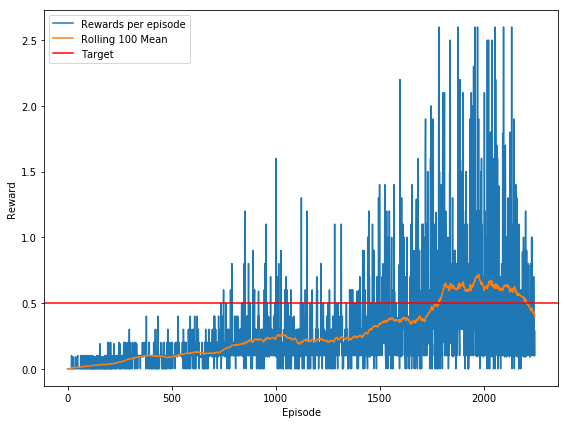

In [33]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
plt.plot(scores_list, label="Rewards per episode")
plt.plot(rolling_ave_100_list, label="Rolling 100 Mean")
plt.axhline(y=.5, color="r", label="Target")#, xmin=0.25, xmax=0.402, linewidth=2, color = 'k')
ax.set_xlabel("Episode")
ax.set_ylabel("Reward")
ax.legend()
plt.tight_layout()